# House Price Data Predictive Model

In [6]:
# importing the necessary Library for data analysis

import pandas as pd #library for data analysis
import numpy as np #library for mathematical computing
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10) #library for data visualization

In [7]:
# Reading the CSV data for further data analysis

df = pd.read_csv("HousesData.csv")

df.head() #viewing top five rows to verify the data is read successfully

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df.shape # to see the number of rows and columns in the data

(13320, 9)

In [9]:
#we have total 13320 rows and 9 columns

In [10]:
# finding the count of each area_type

df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
#droping the columns assuming that these will not be required in price prediction

df1 = df.drop(['area_type','society','balcony','availability'],axis='columns') 
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning

In [12]:
#finding the total null values in each columns 

df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
# we have small number of null values in the each columns so droppping them to remove null values

df2 = df1.dropna()

df2.isnull().sum() #checking is there any null values 

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
#After removing the null values checking numbers of rows and columns

df2.shape

(13246, 5)

In [15]:
df2['size'].unique() #checking the unique values in the column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
# BHK and bedroom is same so creating a new column name BHK and taking numbers as the value of each columns

df2['bhk'] = df2['size'].apply(lambda x:int(x.split( ' ' )[0]))

C:\Users\ACER\AppData\Local\Temp\ipykernel_25000\2587166690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x:int(x.split( ' ' )[0]))


In [17]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df2['bhk'].unique() #finding how many unique value does bhk have

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [19]:
df2[df2.bhk>20] #checking the bhk above 20 we found outliers in total sqft

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
df2.total_sqft.unique() #checking the values in total_sqft we also found range like 1133 - 1384

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
# Checking the variations in the total_sqft
# function to detect the values in the columns is float or not

#function will try to convert the values in float but if the values are in range it will show false

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df2[~df2['total_sqft'].apply(is_float)].head(10) # this will return true but to see values that is not valid float number use ~

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [22]:
# function which takes range as input and returns average value 

def convert_sqft_to_num(x):
    tokens = x.split('-')  # Splits the input using '-' sign
    if len(tokens) == 2:  # If there are two tokens
        return (float(tokens[0]) + float(tokens[1])) / 2  # Convert tokens to float and take the average
    try:
        return float(x)  # If the input is a single number, convert it to float
    except ValueError:
        return None  # If conversion fails, return None


In [23]:
convert_sqft_to_num('2166') #since the number is normal it only changed it to the float

2166.0

In [24]:
convert_sqft_to_num('2100 - 2850')  #since the number was in range took average betweeen them

2475.0

In [25]:
convert_sqft_to_num('34.46Sq. Meter') # it did not return anything

In [26]:
# applying the function to the total_sqft column and creating the new dataframe

df3 = df2.copy()

df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [27]:
#checking the values which were in range worked or not

df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature Engineering

In [28]:
df4 = df3.copy()

# in Real state market price per sqft is important so creating that

df4['price_per_sqft'] = df3['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
#exploring location column how many location are there

len(df4.location.unique()) # this is too much 

1304

In [30]:
# exploring more in location column

df4.location = df4.location.apply(lambda x:x.strip()) #removing extra space in the location columns

In [31]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats  #we can see location Whitefield have 535 datapoints

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [32]:
# we can make the location less than 10 data points called as others 

len(location_stats[location_stats<=10]) #finding the location that are less than 10 datapoints



1052

In [33]:
#location stats that are less than 10

location_stats_less_than_10 = location_stats[location_stats<=10]
print(location_stats_less_than_10) 

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64


In [34]:
len(df4.location.unique()) # total values in location

1293

In [35]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x) # prints x location is other if the x is in location_stats_less_than_10 
len(df4.location.unique()) #now we have only 242 value in location column that means it will be easy for us to work and the lamda function worked


242

In [36]:
df4.head(10) #we can see location having less than 10 data point is converted to other

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Detection and Outlier Removal

In [37]:
# 300 sqft a room is a typical threshold 
# determinning that finding the property the threshold is not met

df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [38]:
# 1020 sqft and 6 bhk is unusal 
# similarly 600sqft and 8 bhk is also unusal these are data error i.e outliers
#removing all that rows that has data error

df4.shape

(13246, 7)

In [39]:
#removing all that rows that has data error
df5 = df4[~(df4.total_sqft/df4.bhk<300)]  
df5.shape


(12502, 7)

In [40]:
#checking the price per sqft to find the outliers

df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
# the max per sqft is 176470.588235 which is very high and min is 267 which is very low 
# we will remove the outliers using standard deviation

In [42]:
# removing outliers per location

def remove_pps_outliers(df): #taking the dataframe as input
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #grouping the data by location
        m = np.mean(subdf.price_per_sqft) # per location i get subdf taking the mean of the price per sqft
        st = np.std(subdf.price_per_sqft) # taking the standard deviation of the price per sqft
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] #taking the data that is in the range of mean and standard deviation
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

#we removed close to 2 thousand outliers

(10241, 7)

In [43]:
!pip install matplotlib pandas

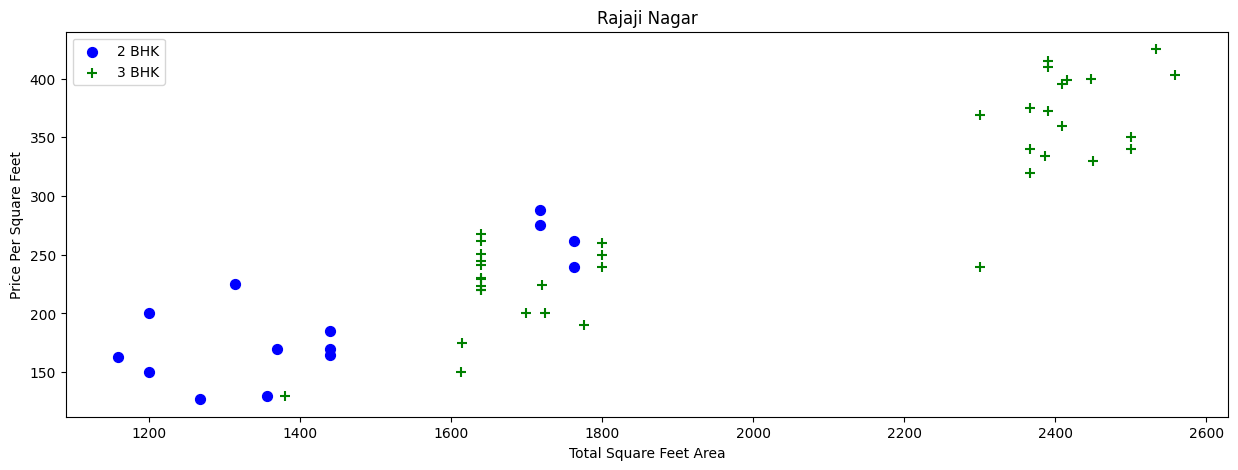

In [44]:
# checking whether the property proce of 3 bedroom apartment are more then 2 bedroom apartment for same sqft area

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

# Ensure data preprocessing has been done before reaching this stage
# Example DataFrame structure:
# df6 = pd.read_csv("CleanedHousesData.csv")

# Function to plot scatter chart
def plot_scatter_chart(df, location): 
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 5)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show()

# Call the function for visualization
plot_scatter_chart(df6, "Rajaji Nagar")

    

In [45]:
# Around 1700 sqft area the 2 bed room apartment prices are higher then 3 bed room 
#removing those outliers

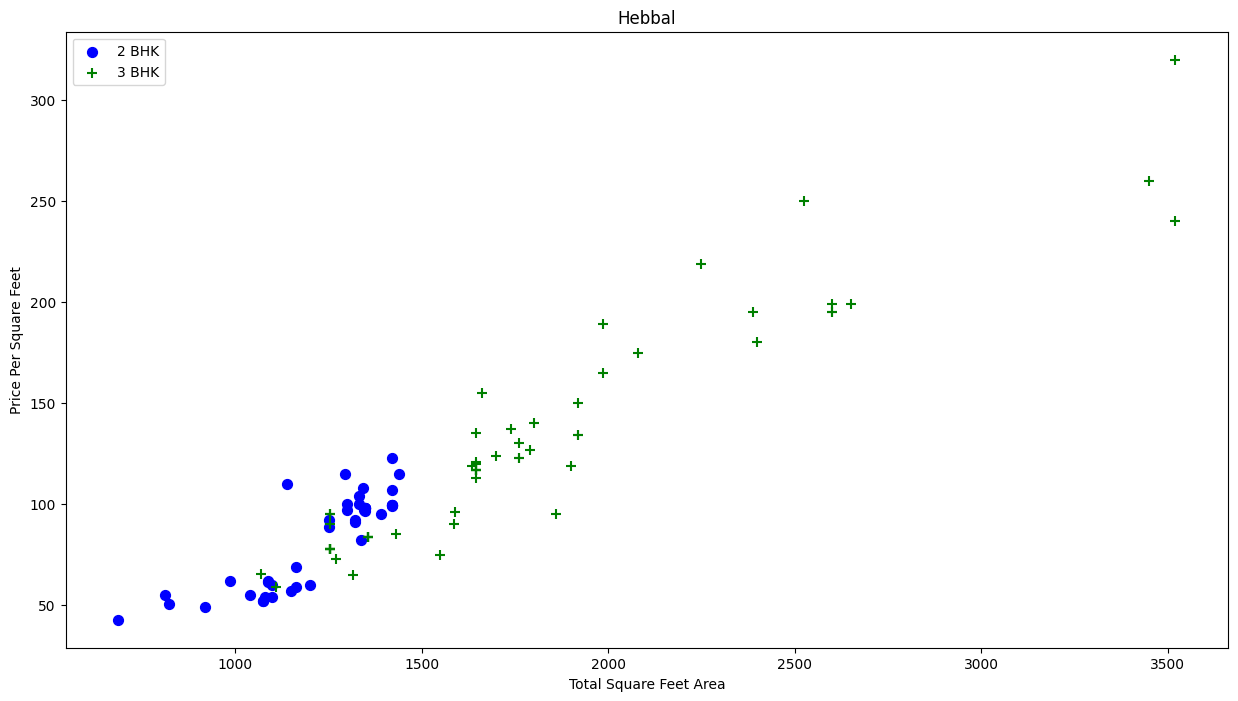

In [46]:
def plot_scatter_chart(df, location): # checking again for different location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 8)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show()

# Call the function for visualization
plot_scatter_chart(df6, "Hebbal")

In [47]:
# here also we saw that blue dots have higher values than green dots 
# so removing the outliers

# We should also remove properties where the same location, the price of (for example) 3 bedroom apartment isless than 2 bedroom apartment (with same square ft area).
# What we will do is for a given location, we will build a dictionary of stats per bhk i.e 

{
    '1' : {                              # 1 bedroom apt homes
        'mean' : 4000,
        'std' : 2000,
        'count' : 34
    },
    '2' : {                             #filtering out 2 bhk whose value is less than 1 bhk mean cause 2 bhk should have little higher value than 1bhk
        'mean' : 4300,
        'std' : 2300,
        'count' :22
    },
}

#Now we can remove those 2 bhk apartments whose price_per_sqft isless than mean price_per_sqft of 1 bhk apartment


{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [48]:
 #filtering out 2 bhk whose value is less than 1 bhk mean cause 2 bhk should have little higher value than 1bhk

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'): #location groupby going through every location df 
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'): # for every location df creating new df based on bhk 
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft), # per bhk df coumputhing mean std and count
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('bhk'):  # trying to exclude those df whose value of price per sqft is less then the mean of the previous bhk 
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis="index")

df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

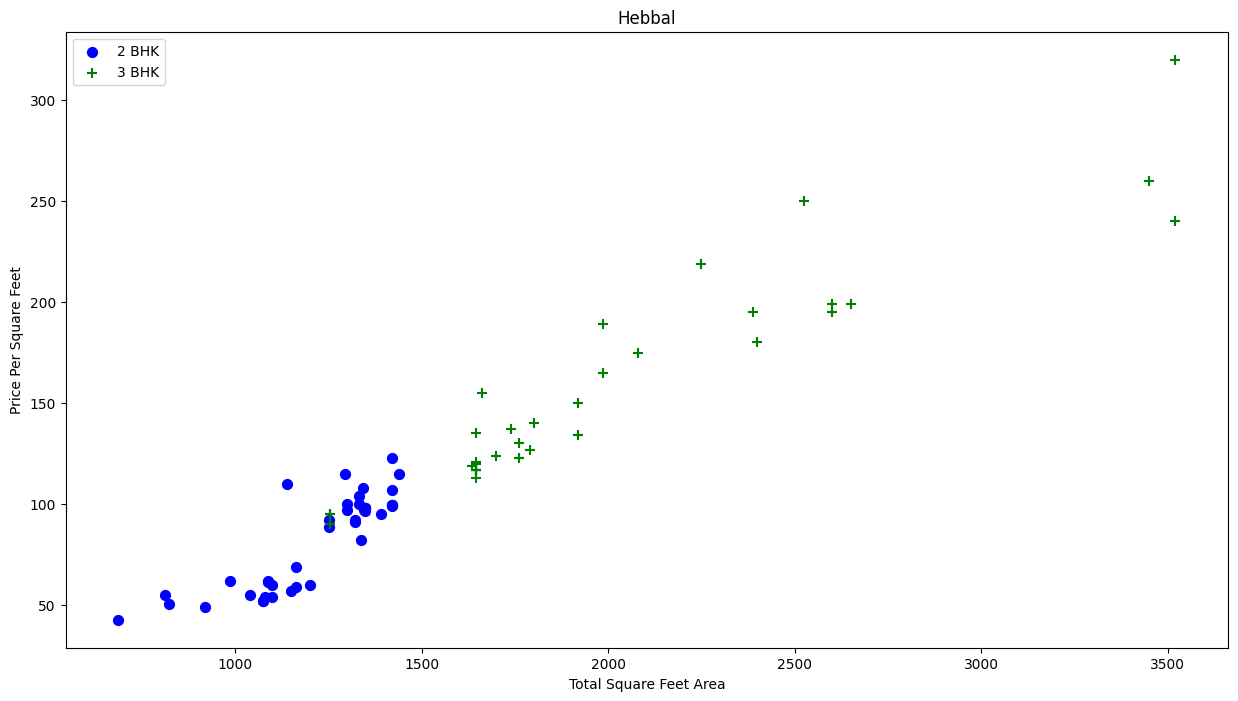

In [49]:
# lets plot the scatter plot to see what kind of improvement it has done 

plot_scatter_chart(df7,"Hebbal")

In [50]:
# we can notice that data points around 1000 - 1400 are gone now 
# sso majority of datapoint for 3 bhk has higher values are greatr than 2

Text(0, 0.5, 'count')

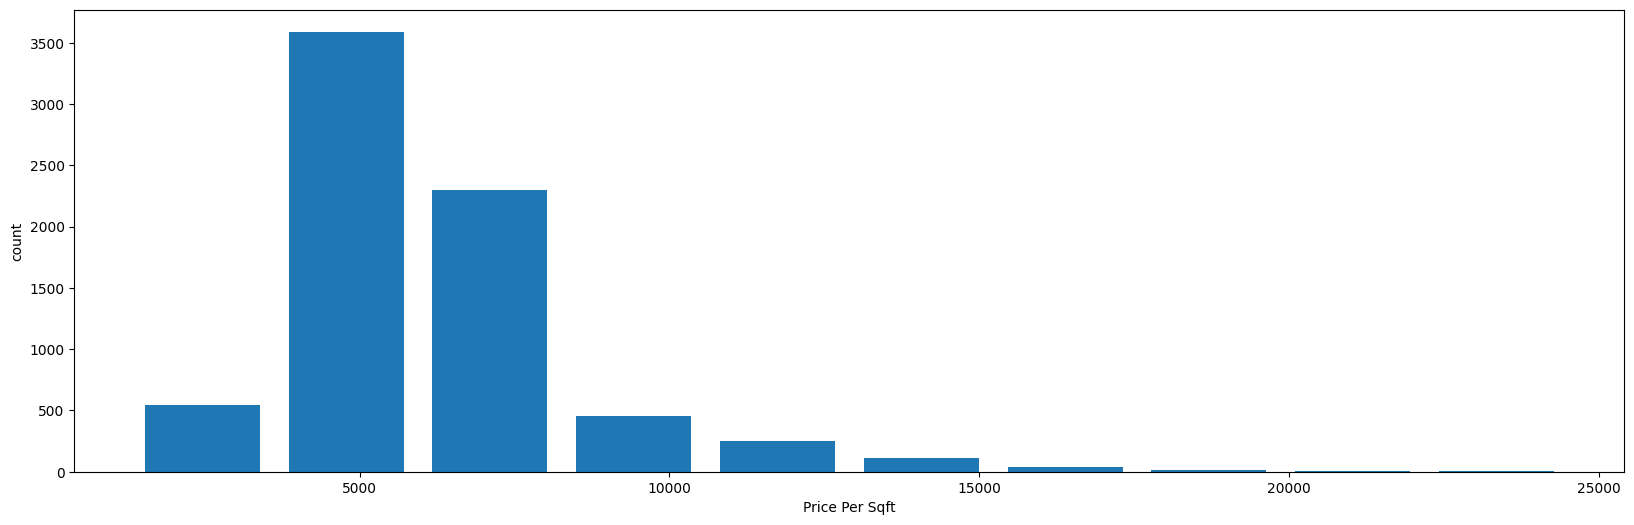

In [51]:
# plotting histogram to see how many properties are there in per sqft area 

import matplotlib 
matplotlib.rcParams["figure.figsize"]  = (20,6)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("count")

In [52]:
# we can see majority of datapoints are between 0 - 10000
# our data has normal distribution

In [53]:
# checking bathroom features
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
# we can see that there are properties which has even like 16 bath rooms
# thats unusal so 

df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [55]:
# some of this is ok 12000 sqft and 10 bhk 12 bathrooms
# usually when we have 2 bhk we have 2 or 3 bath but its unusal to have 4 
# any time we have no. of bath > no. of bhk + 2 we are removing that as outliers

Text(0, 0.5, 'Count')

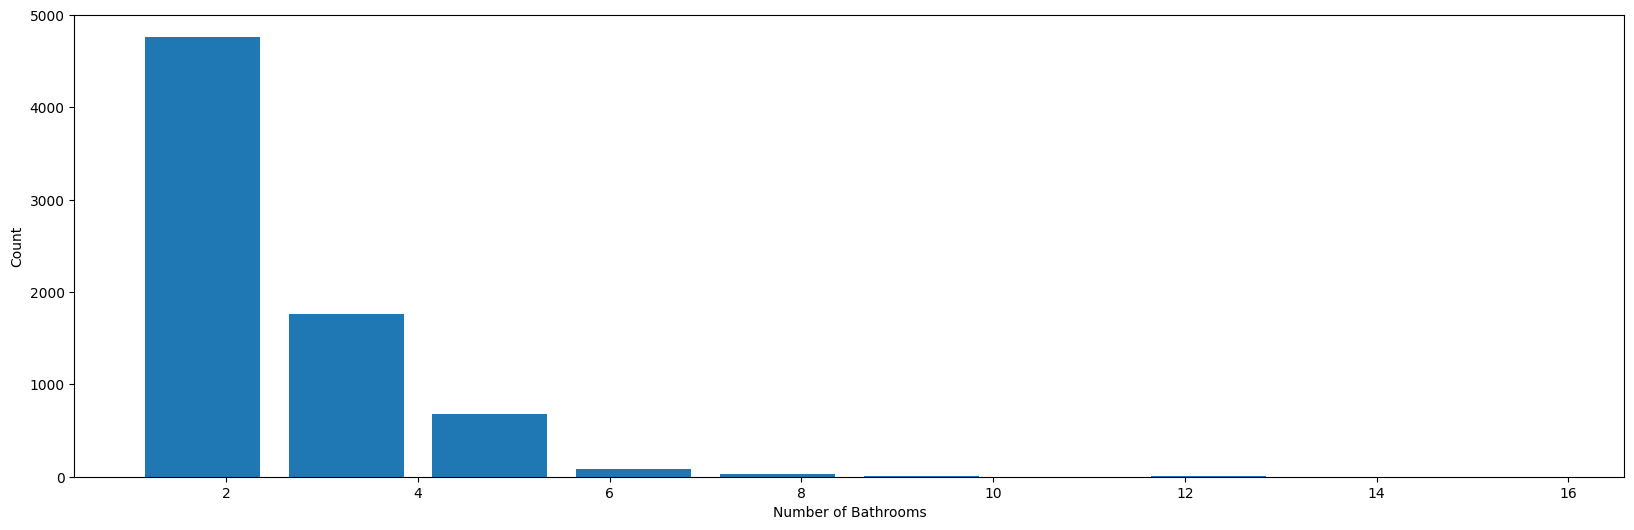

In [56]:
# lets plot histogram first 
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [57]:
# we can see that majority of the properties have 2 - 5 bathrooms and few outliers

In [58]:
#Assuming any time we have no. of bath > no. of bhk + 2 we are removing that as outliers

df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [59]:
# removing the outliers i.e 4 bhk having 7 bathrooms
# 3 bhk having 6 bathrooms

df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

In [60]:
# Now we have cleaned the data and removed the outliers its Pretty much ready for the machine learning training for that we have to remove un necessary columns ie size, price_per_sqft

In [61]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


## Building Machine Learning Model

In [62]:
# we have to convert the location column to numerical column  using one hot encoding because model cannot take character

dummies = pd.get_dummies(df9.location)    #creating dummy columns for location
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
# appending it to the original dataframe

df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns') #TO AVOID DUMMY VARIABLE TRAP WE DROP ONE COLUMN
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
# now all the location are dummy and coded in numerical form now we can drop the location column

df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
df11.shape

(7251, 245)

In [66]:
X = df11.drop('price',axis='columns') #taking all the columns except price as input
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
y = df11.price #taking price as output
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [68]:
# we also have to split the data into training and testing dataset
# then we use training data to train the model and testing data to test the model

In [69]:
# we are using train_test_split function from sklearn library to split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) #splitting the data into 80% training and 20% testing

In [70]:
from sklearn.linear_model import LinearRegression #importing the linear regression model
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train) #training the model
lr_clf.score(X_test,y_test) #THIS WILL GIVE THE ACCURACY OF THE MODEL 

0.8452277697874337

In [71]:
# the score is 84% which is good

In [72]:
# we are using k fold cross validation to measure the accuracy of the model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
 
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #creating a shuffle split for cross validation it will randomly shuffle the data and split it into 5 parts
 
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [73]:
# we can see that the accuracy is 82% - 88% which is good

In [74]:
# trying different models to see which model is best for our data
# for that we use grid search CV its a good api that sklearn provides which can run your model with different parameters,regressors 

# Required imports
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Function to find the best model using grid search cv
def find_best_model_using_gridsearchcv(X, y):
    algos = {                                                                                   
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),  # Scale features before passing them to the model
                ('regressor', LinearRegression())  # Linear Regression
            ]),
            'params': {
                'regressor__fit_intercept': [True, False]  # Fit intercept parameter
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],  # L1 regularization parameter
                'selection': ['random', 'cyclic']  # Algorithm for coordinate descent
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Criteria for splitting
                'splitter': ['best', 'random']  # How to choose the split at each node
            }
        }
    }
    
    scores = []  # Create a list to store the scores
    
    # Cross-validation script to shuffle samples and get better results
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    # Iterate through each model and its parameters
    for algo_name, config in algos.items():
        # Initialize grid search cv with models and params
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)  # Fit the model
        
        scores.append({  # Append results to the scores list
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    # Return the scores as a DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage:
# Ensure X and y are defined and preprocessed
find_best_model_using_gridsearchcv(X, y)  # Call the function



,model,best_score,best_params
0,linear_regression,0.818354,{'regressor__fit_intercept': True}
1,lasso,0.687475,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.720682,"{'criterion': 'squared_error', 'splitter': 'be..."


In [75]:
# WE can see that linear regression is the best model for our data

In [76]:
# lr_clf.score(X_test,y_test) #THIS gives us the accuracy of the model so we use that to predict the price for some data

def predict_price(location,sqft,bath,bhk): #function to predict the price
    loc_index = np.where(X.columns==location)[0][0] #finding the index of the location
    
    x = np.zeros(len(X.columns)) #creating an array of zeros
    x[0] = sqft #taking the input values
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0: #if location is present
        x[loc_index] = 1 #putting the value of location as 1
        
    return lr_clf.predict([x])[0] #predicting the price

In [77]:
predict_price('1st Phase JP Nagar',1000, 2, 2) #predicting the price for 1st phase jp nagar 1000 sqft 2 bath 2 bhk we got 83.86 lakhs

c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.4990467719011)

In [78]:
predict_price('1st Phase JP Nagar',1000, 2, 3) #predicting the price for 1st phase jp nagar 1000 sqft 3 bath 3 bhk we got 81.73 lakhs
#here we can see that the price is less than the previous one because the bhk is more that means we have data which has more sqft with more price

c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(81.72616900765911)

## Export the tested model to a pickle file

In [79]:
import pickle #importing the pickle library to save the model  
with open('HousesData.pickle','wb') as f: #saving the model
    pickle.dump(lr_clf,f)

In [80]:
import json #importing the json library to save the columns
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f: #saving the columns
    f.write(json.dumps(columns))